In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
data = load_iris()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.DataFrame(data.data[:,2:], columns=["Petal_Length", "Petal_Width"])

In [5]:
df.head()

,Petal_Length,Petal_Width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


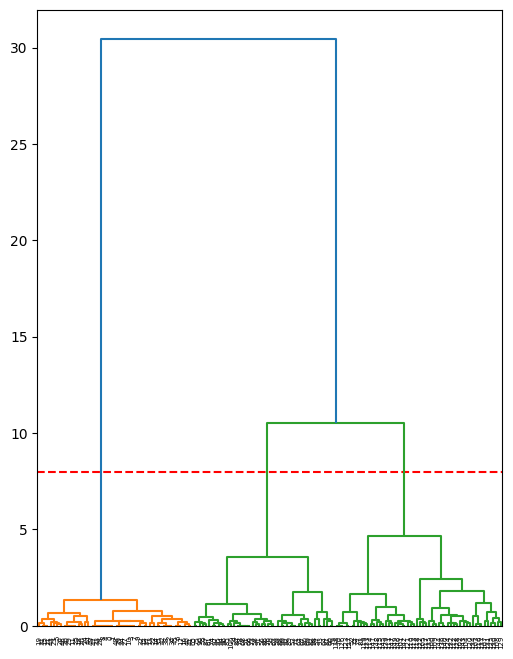

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 8))
plt.axhline(y = 8, color = "red", linestyle="--")
dd = sch.dendrogram(sch.linkage(df, method='ward'))

In [77]:
agg_m = AgglomerativeClustering(n_clusters=3, linkage="ward")

In [78]:
agg_m.fit(df)

AgglomerativeClustering(n_clusters=3)

In [79]:
labels = agg_m.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

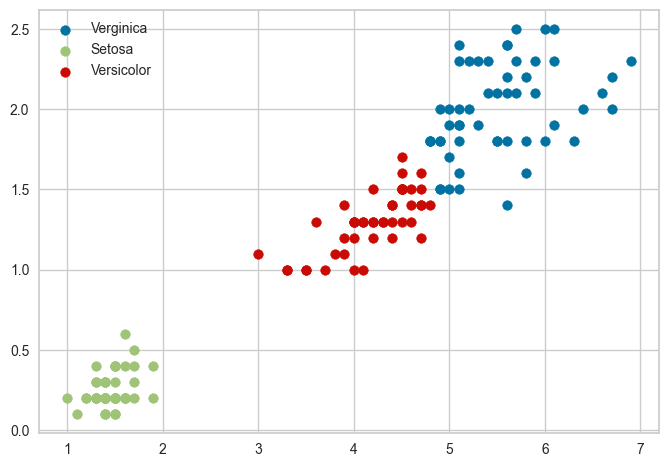

In [80]:
plt.scatter(df.iloc[labels==0,0], df.iloc[labels==0,1], label="Verginica")
plt.scatter(df.iloc[labels==1,0], df.iloc[labels==1,1], label="Setosa")
plt.scatter(df.iloc[labels==2,0], df.iloc[labels==2,1], label="Versicolor")
plt.legend()
plt.show()

In [81]:
new_labels = list(map(lambda x: 1 if x==2 else (0 if x==1 else 2), labels))

In [82]:
new_labels = np.array(new_labels)
new_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [84]:
accuracy_score(new_labels, data.target)

0.96

In [85]:
confusion_matrix(new_labels, data.target)

array([[50,  0,  0],
       [ 0, 45,  1],
       [ 0,  5, 49]], dtype=int64)

In [86]:
print(classification_report(new_labels, data.target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.90      0.98      0.94        46
           2       0.98      0.91      0.94        54

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [87]:
error = []
for i in range(1,11):
    agg = AgglomerativeClustering(n_clusters=i)
    agg.fit(df)
    l = agg.labels_
    new_l = np.array(list(map(lambda x: 1 if x==2 else (0 if x==1 else 2), l)))
    error.append(1-accuracy_score(new_l, data.target))

In [88]:
error

[0.6666666666666667,
 0.33333333333333337,
 0.040000000000000036,
 0.9933333333333333,
 0.6799999999999999,
 0.6799999999999999,
 0.8733333333333333,
 0.4,
 0.74,
 0.7666666666666666]

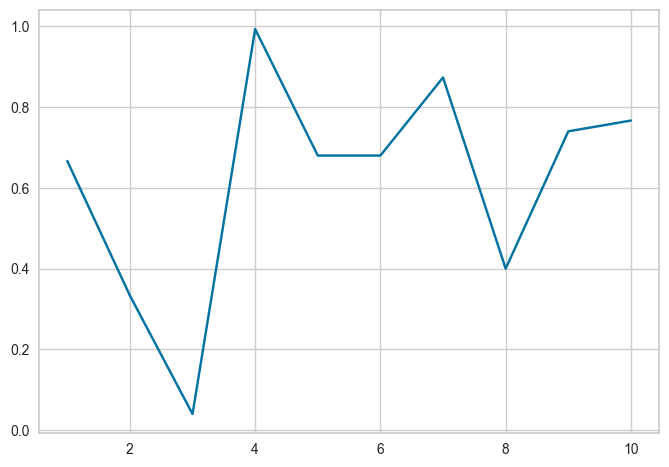

In [89]:
plt.plot(range(1,11), error)

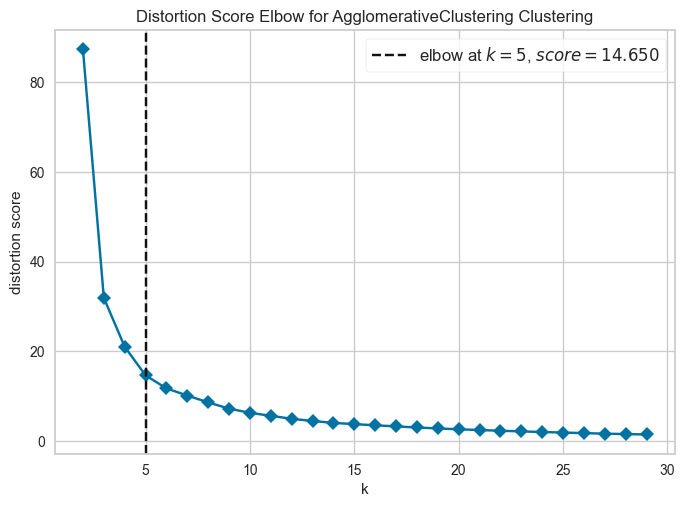

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
visualizer.fit(df)
visualizer.show()

In [60]:
df

,Petal_Length,Petal_Width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3
